In [2]:
import pandas as pd

   binary-trees  fannkuch-redux     fasta  mandelbrot    n-body  regex-redux  \
0      2.836264       15.474986  1.319816    4.755265  4.575501     7.021974   
1      2.311000       15.049000  1.084000    4.789000  4.464000     0.070000   

   spectral-norm  
0       1.586289  
1       1.435000  

RATIOS (Java_100 : Java)
binary-trees      0.814804
fannkuch-redux    0.972473
fasta             0.821326
mandelbrot        1.007094
n-body            0.975631
regex-redux       0.009969
spectral-norm     0.904627
dtype: float64


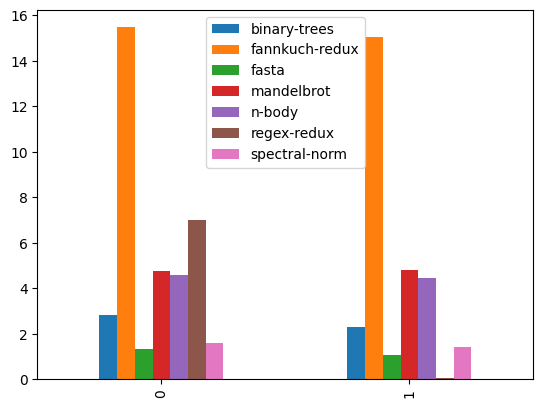

In [15]:
java_100_results = {}
with open('java_100.txt', 'r') as f:
    for line in f.readlines():
        bench, time = line.split(' ')
        hr, mn = time.strip().split(':')
        java_100_results[bench] = round((int(hr)*60 + float(mn))/100, 3)

java_results = pd.read_csv('Java.csv')
data = {}
for bench in java_results:
    if bench.endswith('(runtime)'):
        bench_name = bench.split(' ')[0]
        if bench_name in java_100_results:
            data[bench_name] = [java_results[bench].mean(), java_100_results[bench_name]]
data = pd.DataFrame.from_dict(data)
ax = data.plot.bar()
print(data)
print(f'\nRATIOS (Java_100 : Java)\n{data.loc[1]/data.loc[0]}')